In [112]:
import numpy as np
import math
from scipy.linalg import sqrtm
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt
#import pdb


In [113]:
# Compute affinity matrix
def compute_affinity(Ad):
    A = np.zeros((len(Ad), len(Ad))) # Define Affinity matrix
    for j in range(len(data)):
        for i in range(len(data)):
            if i!=j:
                a = Ad[i]-Ad[j] # Subtract two vectors
                A[i][j] = math.exp((-(np.linalg.norm(a)**2)/2*sigma)) 
            else:
                A[i][j] = 0
    return A

In [114]:
def diagonal_matrix(A):
    D = np.zeros((len(A), len(A))) #Define matrix
    for i in range(0, len(A)):
        D[i][i]=sum(A[i,:]) # Value is teh sum of the row
    sqrtD = sqrtm(D) # Square root of D matrix
    L = np.linalg.inv(sqrtD) @ A @ np.linalg.inv(D) # n.dot multiplications and inverse matrices
    return L, D

In [115]:
def compute_eigenvectors(L, k):
    evev = np.linalg.eig(L) # Compute eigenvectos and eigenvalues 
    evalues = evev[0] # Get eigenvalues
    evectors = evev[1] # Get eigenvectors
    result = [] # Buffer for result
    ind = 0 # Indicator for loop control
    for evalue in evalues:
        result.append(np.linalg.norm(evalue)) # Store a positive modulo of the eigencalue
    norm_evalues=np.array(result) #Now we have the modulo of evalues as numpy array
    indexes = norm_evalues.argsort()[-k:][::-1] # Extract k highest values indexes
    V = np.zeros((len(L), k)) # Type of evectors can be complex
    for value in indexes:
        V[:,ind] = evectors[:,value] # Stack the k highest evectors to V
        ind = ind + 1 # Increment the loop control
    return V, result, indexes

In [116]:
def normalize_vectors(V):
    N = np.zeros((len(V), V.shape[1])) # Define normalised matrix
    for col in range(0, V.shape[1]-1):
        vector = V[:,col] # Select a column frmo V (eigenvector)
        vector_norm = vector/np.linalg.norm(vector) # Normalize using modulo that eigenvector
        N[:,col] = vector_norm # Store that vector in the normalized matrix
    return N

In [117]:
def k_means_clustering(X, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X) # Define the kmeans clusterization algorithm and fit it 
    return kmeans

**Begin of the programme for the first graph**

In this programme we will call the above-written transformations for a simple graph (example1.txt), plot the k most relevant eigenvalues and plot the clusterized graph. 

The predefined k is 10 for this case.

In [118]:
# Load data
data = np.genfromtxt("example1.txt", delimiter=",")

# Create graph
G = nx.Graph() 
G.add_edges_from(data)

# Get Adjacency matrix
aux = nx.linalg.graphmatrix.adjacency_matrix(G)
Ad = np.array(aux.todense())

# Set variable
sigma = 1 # Controls affinity speed for spatial points
k = 10 # Number of subsets

In [119]:
# Get diagonal matrix
L, D = diagonal_matrix(Ad)

# Get eigenvectors
V, evalues, indexes = compute_eigenvectors(L, k)

# Do clusterization
kmeans = k_means_clustering(V, k)


Text(0.5, 1.0, '10 Highest Eigenvalues')

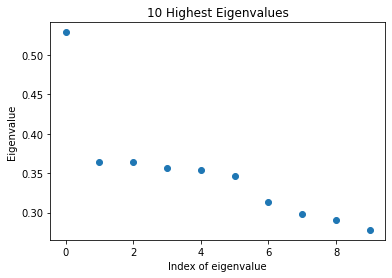

In [120]:
# Plot eigenvalues
k_highest_values = np.take(evalues, indexes)
plt.scatter(range(0, k), k_highest_values)
plt.xlabel("Index of eigenvalue")
plt.ylabel("Eigenvalue")
plt.title("{} Highest Eigenvalues".format(k))

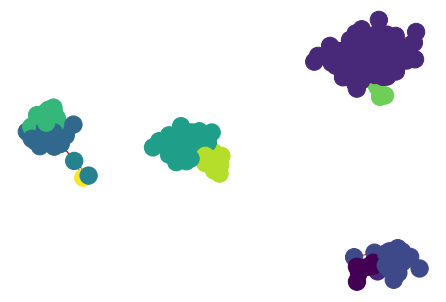

In [121]:
# Draw clustered graph
n_clusters = k
nx.draw(G, node_color=kmeans.labels_, edge_color="red")

In [122]:
# Get cluster for each node
nodes_clusters = kmeans.predict(V)
# Assign each node to a cluster
clusters = list(range(k))
result=[] # Get cluster id of each node
for id in clusters:
    result.append(np.where(nodes_clusters==id))

print(result)

[(array([214, 230, 231, 235, 236, 237, 238]),), (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  21,  22,  23,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 229]),), (array([206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 232, 233, 234, 239,
       240]),), (array([165, 166, 167, 168, 170, 171, 173, 174, 175, 176, 178, 189, 193,
       195, 196, 197, 198, 199, 200, 202, 204, 205]),), (array([177, 180]),), (array(

**ANALYSIS FOR SYNTHETIC GRAPH**

In this part of the laboratory we will analyze a synthetic graph with the functions defined above. The file is called example2.txt. We will ignore the third column from this file.

We will run the above defined transfromation for a k = 2, which we have found most appropiate for this graph clusterizations after running many times the algorithm with different k values.

In [123]:
# Load data
data = np.genfromtxt("example2.txt", delimiter=",")
data = data[:, 0:2] # Select nodes from dataset and discard last column

# Create graph
G = nx.Graph() 
G.add_edges_from(data)

# Get Adjacency matrix
aux = nx.linalg.graphmatrix.adjacency_matrix(G)
Ad = np.array(aux.todense())

# Create data matrix 
sigma = 1
k = 2 # Number of subsets

In [124]:
# Get diagonal matrix
L, D = diagonal_matrix(Ad)

# Get eigenvectors
V, evalues, indexes = compute_eigenvectors(L, k)

# Do clusterization
kmeans = k_means_clustering(V, k)


Text(0.5, 1.0, '2 Highest Eigenvalues. SYNTHETIC GRAPH')

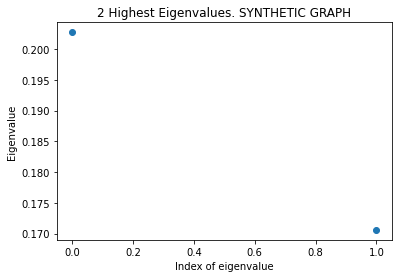

In [125]:
# Plot eigenvalues
k_highest_values = np.take(evalues, indexes)
plt.scatter(range(0, k), k_highest_values)
plt.xlabel("Index of eigenvalue")
plt.ylabel("Eigenvalue")
plt.title("{} Highest Eigenvalues. SYNTHETIC GRAPH".format(k))

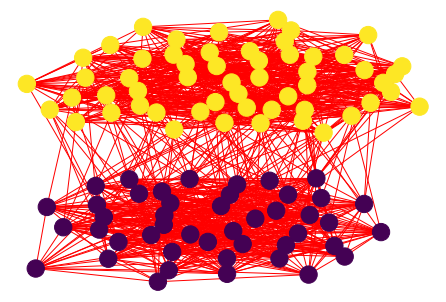

In [126]:
# Draw clustered graph
n_clusters = k
nx.draw(G, node_color=kmeans.labels_, edge_color="red")

In [127]:
# Get cluster for each node
nodes_clusters = kmeans.predict(V)
# Assign each node to a cluster
clusters = list(range(k))
result=[] # Get cluster id of each node
for id in clusters:
    result.append(np.where(nodes_clusters==id))

print(result)

[(array([34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 56, 57, 58, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 92, 93, 94, 95, 97, 98, 99]),), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       40, 55, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 75, 86, 87, 88,
       89, 90, 91, 96]),)]
